## Instructions

Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features (X).

Create a query to get the list of all unique film titles and a boolean indicating if it was rented (rental_date) in May 2005. (Create new column called - 'rented_in_may'). This will be our TARGET (y) variable.

Read the data into a Pandas dataframe. At this point you should have 1000 rows. Number of columns depends on the number of features you chose.

Analyze extracted features (X) and transform them. You may need to encode some categorical variables, or scale numerical variables.

Create a logistic regression model to predict 'rented_in_may' from the cleaned data.
Evaluate the results.

## get data

In [1]:
# prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:
# get the data
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)


In [3]:
query = '''SELECT distinct f.title, f.release_year, f.rental_duration, f.rental_rate, f.length, f.rating, count(r.rental_id) as nb_rented,
max(CASE WHEN r.rental_date BETWEEN '2005-05-01' AND '2005-05-31' THEN 1 ELSE 0 END) AS rented_in_may 
FROM film f 
left JOIN inventory i ON f.film_id = i.film_id 
left JOIN rental r ON i.inventory_id = r.inventory_id 
group by f.film_id'''

data = pd.read_sql_query(query, engine)
data.head()

,title,release_year,rental_duration,rental_rate,length,rating,nb_rented,rented_in_may
0,ACADEMY DINOSAUR,2006,6,0.99,86,PG,23,1
1,ACE GOLDFINGER,2006,3,4.99,48,G,7,0
2,ADAPTATION HOLES,2006,7,2.99,50,NC-17,12,0
3,AFFAIR PREJUDICE,2006,5,2.99,117,G,23,1
4,AFRICAN EGG,2006,6,2.99,130,G,12,1


## check and clean data (nulls, fixing typos, outliers, distrubutions,...)

## data exploration

In [4]:
data.shape

(1000, 8)

In [5]:
rental = pd.read_sql('rental', engine)
rental.shape

C:\Users\tella\anaconda3\Lib\site-packages\pandas\io\sql.py:1627: SAWarning: Did not recognize type 'geometry' of column 'location'
  self.meta.reflect(bind=self.con, only=[table_name])


(16044, 7)

In [6]:
film = pd.read_sql('film', engine)
film.shape

(1000, 13)

Analyze extracted features (X) and transform them. 

You may need to encode some categorical variables, or scale numerical variables.

In [7]:
data.isna().sum()

title              0
release_year       0
rental_duration    0
rental_rate        0
length             0
rating             0
nb_rented          0
rented_in_may      0
dtype: int64

In [8]:
data['rating'].value_counts()

rating
PG-13    223
NC-17    210
R        195
PG       194
G        178
Name: count, dtype: int64

In [9]:
data['release_year'].value_counts()

release_year
2006    1000
Name: count, dtype: int64

In [10]:
# huhu release_year is 2006 but rented in May 2005

In [11]:
data['rental_duration'].value_counts()

rental_duration
6    212
3    203
4    203
7    191
5    191
Name: count, dtype: int64

In [12]:
data.pivot_table(index=['rating', 'rental_duration'], values = ['title'],aggfunc = ['count']).reset_index()

,rating,rental_duration,count
,,,title
0,G,3,49
1,G,4,28
2,G,5,33
3,G,6,39
4,G,7,29
5,NC-17,3,37
6,NC-17,4,33
7,NC-17,5,43
8,NC-17,6,57


In [13]:
data.pivot_table(index=['nb_rented'], values = ['title'],aggfunc = ['count']).reset_index()

,nb_rented,count
,,title
0,0,42
1,4,3
2,5,14
3,6,31
4,7,38
5,8,36
6,9,44
7,10,38
8,11,39


In [14]:
data.loc[data['nb_rented'] == data['nb_rented'].max()]

,title,release_year,rental_duration,rental_rate,length,rating,nb_rented,rented_in_may
102,BUCKET BROTHERHOOD,2006,7,4.99,133,PG,34,1


In [15]:
data.loc[data['nb_rented'] == data['nb_rented'].min()]
#those films were not rented in May

,title,release_year,rental_duration,rental_rate,length,rating,nb_rented,rented_in_may
13,ALICE FANTASIA,2006,6,0.99,94,NC-17,0,0
32,APOLLO TEEN,2006,5,2.99,153,PG-13,0,0
35,ARGONAUTS TOWN,2006,7,0.99,127,PG-13,0,0
37,ARK RIDGEMONT,2006,6,0.99,68,NC-17,0,0
40,ARSENIC INDEPENDENCE,2006,4,0.99,137,PG,0,0
86,BOONDOCK BALLROOM,2006,7,0.99,76,NC-17,0,0
107,BUTCH PANTHER,2006,6,0.99,67,PG-13,0,0
127,CATCH AMISTAD,2006,7,0.99,183,G,0,0
143,CHINATOWN GLADIATOR,2006,7,4.99,61,PG,0,0
147,CHOCOLATE DUCK,2006,3,2.99,132,R,0,0


## check for multicolinearity

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
corr_matrix=data.select_dtypes('number').corr()

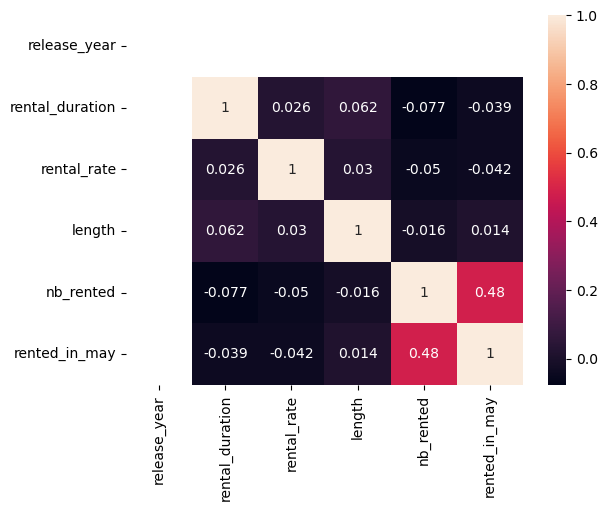

In [18]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [19]:
# No correlation so we keep them all for our model

C:\Users\tella\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


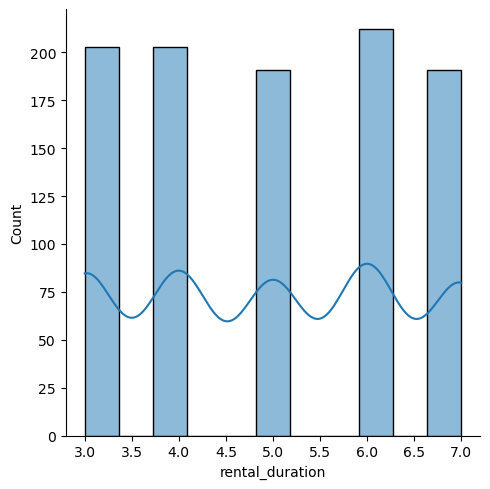

C:\Users\tella\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


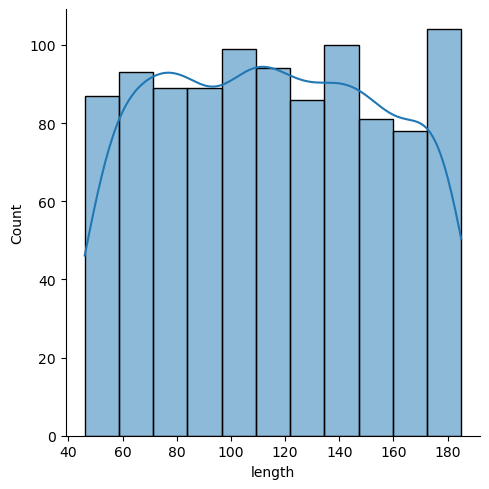

C:\Users\tella\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


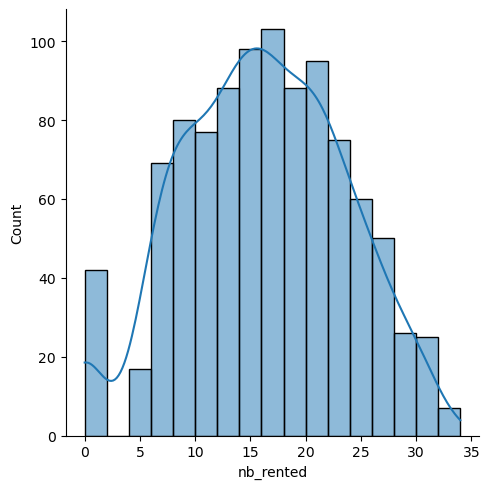

In [20]:
sns.displot(data['rental_duration'], kde=True)
plt.show()

sns.displot(data['length'], kde=True)
plt.show()

sns.displot(data['nb_rented'], kde=True)
plt.show()

## select features

In [21]:
data1=data.drop('title', axis=1)
#data1 = full data without column title for the model

In [22]:
y = data1['rented_in_may']
X = data1.drop('rented_in_may', axis=1)

## X/y split (feature/target) : X, y

train/test split : X_train, X_test, y_train, y_test

num/cat split : X_train_num, X_train_cat, X_test_num, X_test_cat

fit transformer on X_train_num

run transformer on X_train_num : X_train_normalized

run same transformer on X_test_num : X_test_normalized

fit encoder on X_train_cat

run encoder on X_train_cat : X_train_encoded

run same encoder on X_test_cat : X_test_encoded

concat X_train_normalized and X_train_encoded : X_train_transformed

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [24]:
X.dtypes

release_year         int64
rental_duration      int64
rental_rate        float64
length               int64
rating              object
nb_rented            int64
dtype: object

In [25]:
X_train_num = X_train[['release_year', 'rental_rate', 'length', 'nb_rented']]

In [26]:
X_train_cat = X_train[['rental_duration', 'rating']]

In [27]:
display(X_train_num)
X_train_cat

,release_year,rental_rate,length,nb_rented
675,2006,4.99,137,23
358,2006,4.99,173,0
159,2006,0.99,65,19
533,2006,0.99,70,17
678,2006,2.99,50,16
...,...,...,...,...
855,2006,4.99,73,25
871,2006,2.99,185,15
835,2006,2.99,136,7
792,2006,2.99,139,14


,rental_duration,rating
675,7,PG-13
358,6,PG
159,4,PG-13
533,5,PG-13
678,6,PG
...,...,...
855,5,R
871,3,R
835,3,PG
792,6,R


fit transformer on X_train_num

run transformer on X_train_num : X_train_normalized

run same transformer on X_test_num : X_test_normalized

In [29]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm

,release_year,rental_rate,length,nb_rented
0,0.0,1.0,0.654676,0.676471
1,0.0,1.0,0.913669,0.000000
2,0.0,0.0,0.136691,0.558824
3,0.0,0.0,0.172662,0.500000
4,0.0,0.5,0.028777,0.470588
...,...,...,...,...
795,0.0,1.0,0.194245,0.735294
796,0.0,0.5,1.000000,0.441176
797,0.0,0.5,0.647482,0.205882
798,0.0,0.5,0.669065,0.411765


In [30]:
X_test_num = X_test[['release_year', 'rental_rate', 'length', 'nb_rented']]

X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)
X_test_norm

,release_year,rental_rate,length,nb_rented
0,0.0,0.0,0.892086,0.323529
1,0.0,1.0,0.280576,0.617647
2,0.0,0.0,0.834532,0.352941
3,0.0,0.0,0.302158,0.264706
4,0.0,1.0,0.071942,0.264706
...,...,...,...,...
195,0.0,1.0,0.618705,0.264706
196,0.0,0.5,0.517986,0.676471
197,0.0,0.0,0.043165,0.470588
198,0.0,0.5,0.877698,0.294118


fit encoder on X_train_cat

run encoder on X_train_cat : X_train_encoded

run same encoder on X_test_cat : X_test_encoded

In [31]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_cat_encoded = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

X_train_cat_encoded.head()

,rental_duration_4,rental_duration_5,rental_duration_6,rental_duration_7,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [32]:
X_test_cat = X_test[['rental_duration', 'rating']]

cols = encoder.get_feature_names_out(input_features=X_test_cat.columns)
X_test_cat_encoded = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)
X_test_cat_encoded.head()

,rental_duration_4,rental_duration_5,rental_duration_6,rental_duration_7,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


concat X_train_normalized and X_train_encoded : X_train_transformed

In [33]:
X_train_transformed = pd.concat([X_train_cat_encoded, X_train_norm],axis=1)
X_train_transformed

,rental_duration_4,rental_duration_5,rental_duration_6,rental_duration_7,rating_NC-17,rating_PG,rating_PG-13,rating_R,release_year,rental_rate,length,nb_rented
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.654676,0.676471
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.913669,0.000000
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.136691,0.558824
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.172662,0.500000
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.028777,0.470588
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.194245,0.735294
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,1.000000,0.441176
797,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.647482,0.205882
798,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.669065,0.411765


In [34]:
X_test_transformed = pd.concat([X_test_cat_encoded, X_test_norm],axis=1)
X_test_transformed

,rental_duration_4,rental_duration_5,rental_duration_6,rental_duration_7,rating_NC-17,rating_PG,rating_PG-13,rating_R,release_year,rental_rate,length,nb_rented
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.892086,0.323529
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.280576,0.617647
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.834532,0.352941
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.302158,0.264706
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.071942,0.264706
...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.618705,0.264706
196,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.517986,0.676471
197,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.043165,0.470588
198,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5,0.877698,0.294118


# Logistic regression model

In [35]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression().fit(X_train_transformed, y_train)

make predictions using X_test_transfomed : model.predict -> predictions

In [36]:
predictions_train = classification.predict(X_train_transformed)
classification.score(X_train_transformed, y_train)

0.73125

In [37]:
predictions_test = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

0.71

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions_test)

array([[ 42,  33],
       [ 25, 100]], dtype=int64)

compute score using predictions and y_test

In [39]:
y_train.value_counts()

rented_in_may
1    502
0    298
Name: count, dtype: int64

In [40]:
y_test.value_counts()

rented_in_may
1    125
0     75
Name: count, dtype: int64

In [41]:
pd.DataFrame({'y_test':y_test, 'predictions_test':predictions_test})

,y_test,predictions_test
249,0,1
353,1,1
537,0,1
424,1,0
564,1,0
...,...,...
684,0,0
644,1,1
110,1,1
28,0,0
